In [28]:
# from models.resnet_model import get_resnet_model
# import wandb
# wandb.init() 
# wandb.config.NUM_CLASSES = 3
# from torchvision import transforms
# from preprocessing.clahe import CLAHETransform
# from dataset_handler.dataset import ImageDataset
# import torch
# wandb.config.USE_TRANSFORM_AUGMENTATION_IN_TRAINING = True
# wandb.config.USE_CLAHE = False
# wandb.config.TEST_DATA_DIR=r"data\test_metabolic\training_validation_datasets\step_5_cropped_square_adaptive_knee"
# from torch.utils.data import DataLoader, WeightedRandomSampler
# wandb.config.BATCH_SIZE = 32
# wandb.config.NUM_WORKERS=1
# import torch.nn as nn
# wandb.config.DEVICE="cuda"
# wandb.config.USE_OSTEOPENIA = True
# import os



In [29]:
import os
from ultralytics import YOLO
from preprocessing.dedup import dedup_images_from_folder
from preprocessing.preprocess import dataset_statistics, crop_and_save_knees,show_yolo_performance


In [30]:
DEDUP = True
CROP_YOLO = True

In [31]:
my_data_dir = r"data\OS_Collected_Data_dups"
categories = ["Normal", "Osteopenia", "Osteoporosis"]



📊 **Dataset Statistics After step 0:**
  📂 Normal: 780 images
  📂 Osteopenia: 374 images
  📂 Osteoporosis: 793 images


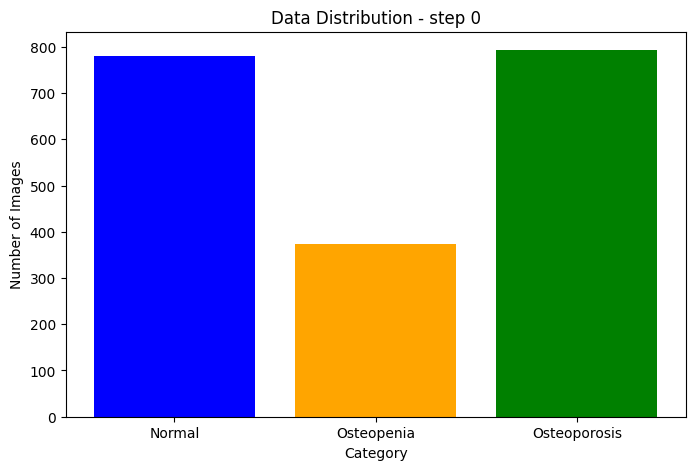

In [32]:
dataset_statistics(my_data_dir, "step 0",categories)

# run over all the data and find duplicates

✅ All files & folders copied to 'data\OS_Collected_Data_dups\no_dups_data'


2025-07-28 23:38:04,195: INFO Start: Calculating hashes...
100%|██████████| 2659/2659 [00:41<00:00, 64.16it/s]
2025-07-28 23:38:47,558: INFO End: Calculating hashes!
2025-07-28 23:38:47,561: INFO Start: Evaluating hamming distances for getting duplicates
2025-07-28 23:38:47,561: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 2659/2659 [00:19<00:00, 138.72it/s]
2025-07-28 23:39:08,557: INFO End: Retrieving duplicates using BKTree algorithm
2025-07-28 23:39:08,557: INFO End: Evaluating hamming distances for getting duplicates


there are 808 unique images from 2659 images
there are 236 images with 1 shows
there are 7 images with 2 shows
there are 964 images with 3 shows
there are 337 images with 4 shows
there are 0 images with 5 shows
there are 0 images with 6 shows
there are 165 images with 7 shows
there are 9 images with 8 shows
there are 133 images with 9 shows
there are 0 images with more than 10 shows


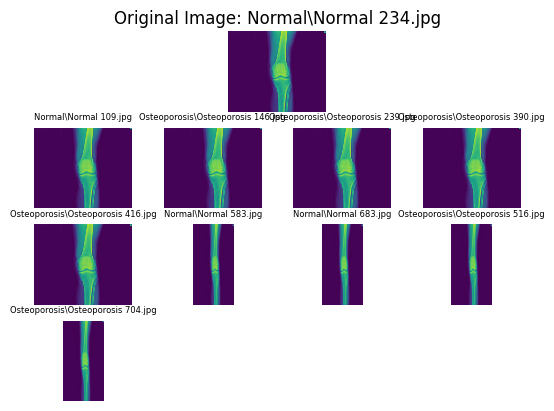

2025-07-28 23:39:09,531: INFO Start: Evaluating hamming distances for getting duplicates
2025-07-28 23:39:09,532: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 2659/2659 [00:19<00:00, 133.45it/s]
2025-07-28 23:39:31,750: INFO End: Retrieving duplicates using BKTree algorithm
2025-07-28 23:39:31,750: INFO End: Evaluating hamming distances for getting duplicates


there are 1386 to remove


In [33]:
if DEDUP:
    dedup_images_from_folder(my_data_dir,4)


📊 **Dataset Statistics After step 1:**
  📂 Normal: 289 images
  📂 Osteopenia: 234 images
  📂 Osteoporosis: 212 images


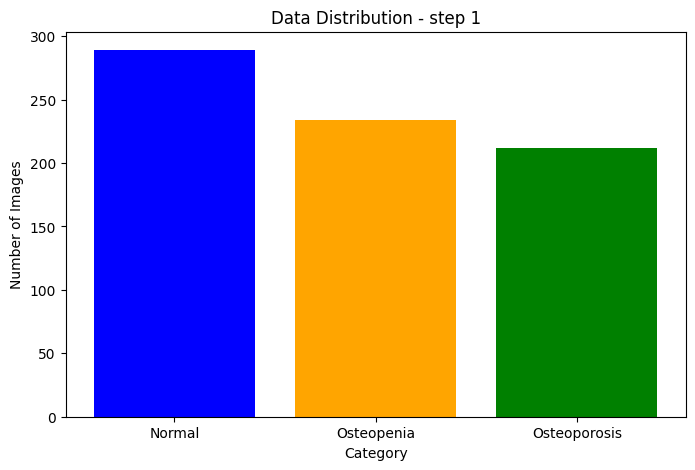

In [25]:
dedup_data_dir= os.path.join(my_data_dir,"no_dups_data")
dataset_statistics(dedup_data_dir, "step 1",categories)

# preprocess the data

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo\yolo_run\weights\best.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider


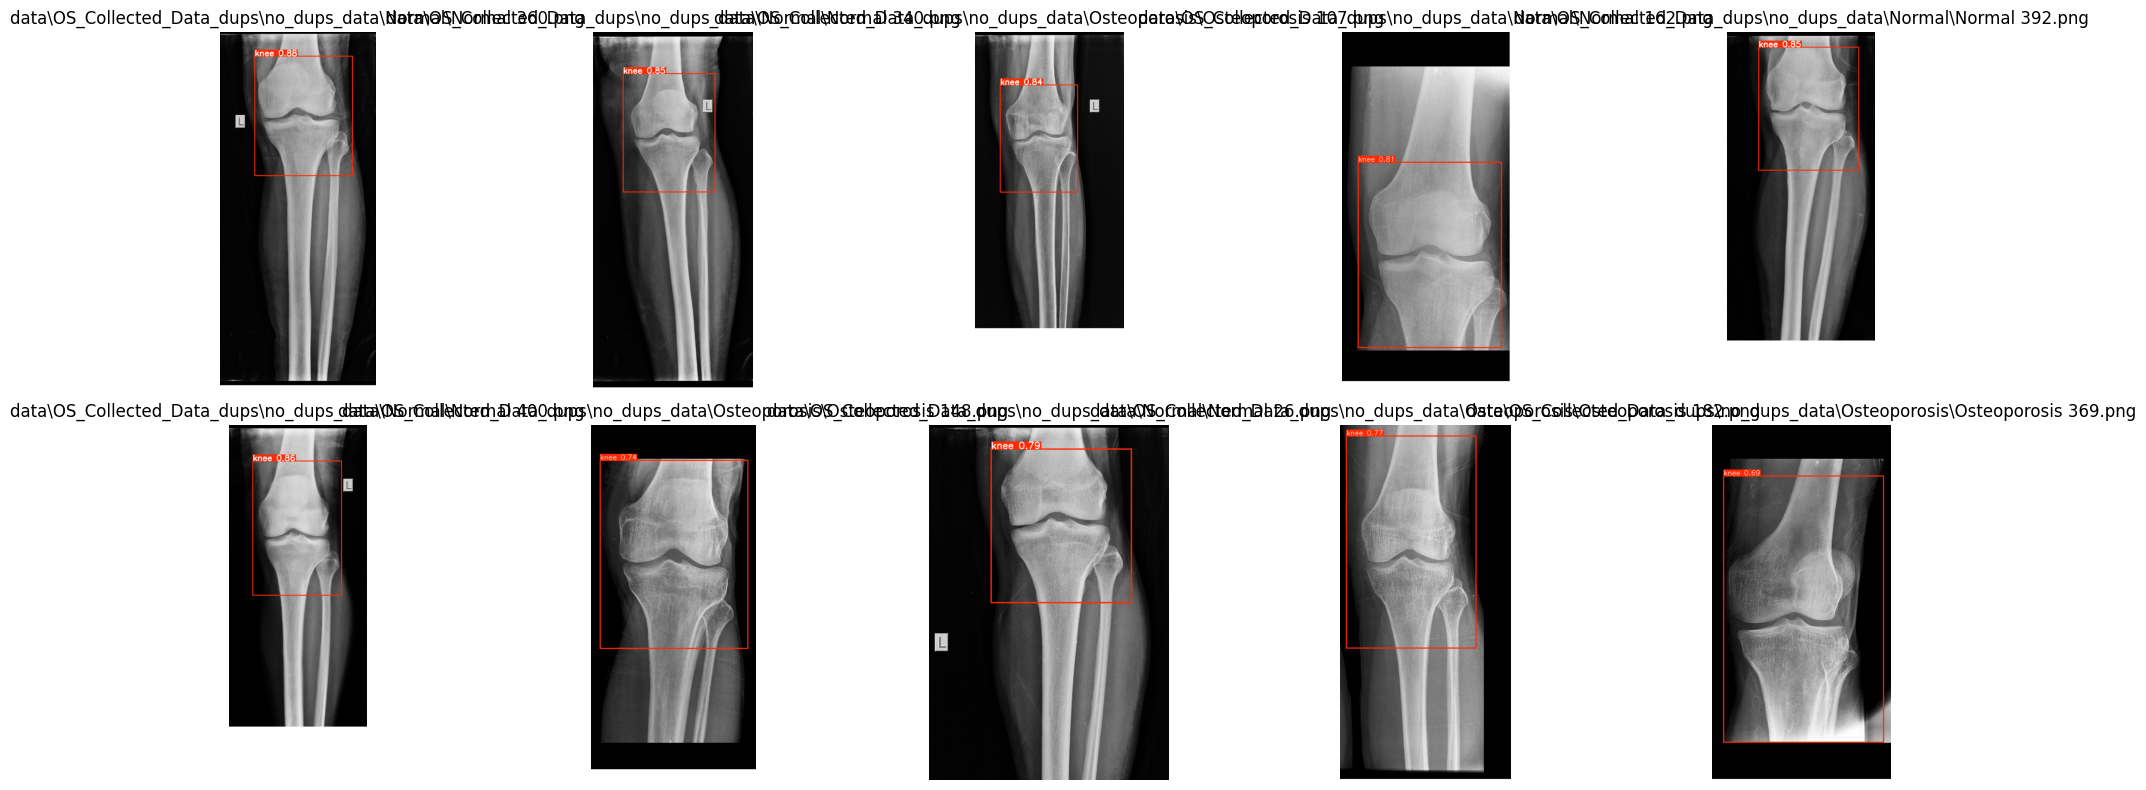

In [26]:

output_path_step5 = os.path.join(my_data_dir, r"cropped_only_both")
model_path = r"yolo\yolo_run\weights\best.onnx"
model = YOLO(model_path)


show_yolo_performance(dedup_data_dir, model, categories)


In [27]:
if CROP_YOLO:
    # Ensure output directories exist
    for category in categories:
        os.makedirs(os.path.join(output_path_step5, category), exist_ok=True)
    crop_and_save_knees(dedup_data_dir, output_path_step5,model,categories)

📂 Processing Normal - 289 images


Cropping Normal: 100%|██████████| 289/289 [00:09<00:00, 30.12it/s]


📂 Processing Osteopenia - 234 images


Cropping Osteopenia: 100%|██████████| 234/234 [00:17<00:00, 13.24it/s]


📂 Processing Osteoporosis - 212 images


Cropping Osteoporosis: 100%|██████████| 212/212 [00:05<00:00, 35.38it/s]


✅ Step 2 Complete: Cropped knees saved with adaptive square logic.


# train few models 

In [38]:
%run __main__.py 


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


loss_type,LabelSmoothingCrossE...


Wandb configuration:
DATA_DIR: c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\data/train_data
TEST_DATA_DIR: c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\data/test_data
DUPLICATE_THRESHOLD: 0.99
YOLO_WEIGHTS_PATH: c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\pretrained\yolo_weights.pt
DEVICE: cuda
BATCH_SIZE: 32
NUM_EPOCHS: 1
LEARNING_RATE: 0.0001
ALEX_FREEZE_FEATURES: True
USE_TRANSFORM_AUGMENTATION_IN_TRAINING: True
USE_CLAHE: False
MODEL_NAME: ResNet50
USE_OSTEOPENIA: True
SKIP_DUP_DATA: False
TRAIN_WEIGHTED_RANDOM_SAMPLER: 1
NUM_WORKERS: 1
USE_TEST_DATA_DIR: True
USE_SCHEDULER: True
USE_LABEL_SMOOTHING: True
USE_CONFIDENCE_WEIGHTED_LOSS: False
USE_HARD_SAMPLING: False
CONFIDENCE_THRESHOLD: 0.85
CONFIDENCE_PENALTY_WEIGHT: 2.0
LABEL_SMOOTHING_EPSILON: 0.1
RESNET_LAYERS_TO_TRAIN: ['fc', 'layer2', 'layer3', 'layer4']
DROPOUT: 0.5
USE_METABOLIC_FOR_TEST: False
USE_K_FOLD: False
K_FOLDS: 5
NUM_CLASSES: 3
FINE_TUNE_LR_MULTIPLIER: 1.0
Run name: lr_0.0001_bs_32_vaxamr
Training 

c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


AttributeError: module '__main__' has no attribute '__spec__'

# show gradcam

# ensemble model

# analysis of the results

# 